In [ ]:
#FDS_PROJECT
#CS23334-Fundamentals of Data Science
#Members:
#Subramanian N-230701348
#Subramanian S-230701349
#Praveen Raj M-230701396
import pandas as pd
file_path ='/content/drive/MyDrive/Colab Notebooks/weightlifting_721_workouts.csv'
data = pd.read_csv(file_path)
selected_columns = data.iloc[:, 1:6]
print(selected_columns.head())

  Workout Name                  Exercise Name  Set Order  Weight  Reps
0        Chest  Incline Bench Press (Barbell)          1   135.0     8
1        Chest  Incline Bench Press (Barbell)          2   135.0     8
2        Chest  Incline Bench Press (Barbell)          3   135.0     5
3        Chest  Incline Bench Press (Barbell)          4   185.0     7
4        Chest  Incline Bench Press (Barbell)          5   230.0     8


In [3]:
print(selected_columns.info())
print(selected_columns.nunique())
target_column = 'Reps'
if selected_columns[target_column].dtype == 'object' or selected_columns[target_column].nunique() < 10:
    print("This is likely a classification problem.")
else:
    print("This is likely a regression problem.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Workout Name   9932 non-null   object 
 1   Exercise Name  9932 non-null   object 
 2   Set Order      9932 non-null   int64  
 3   Weight         9932 non-null   float64
 4   Reps           9932 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 388.1+ KB
None
Workout Name      95
Exercise Name     83
Set Order         11
Weight           177
Reps              24
dtype: int64
This is likely a regression problem.


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
numeric_columns = ['Set Order', 'Weight', 'Reps']

for col in numeric_columns:
    selected_columns[col] = pd.to_numeric(selected_columns[col], errors='coerce')

selected_columns[numeric_columns] = selected_columns[numeric_columns].fillna(selected_columns[numeric_columns].mean())

encoder = LabelEncoder()
categorical_columns = ['Workout Name', 'Exercise Name']
for col in categorical_columns:
    selected_columns[col] = encoder.fit_transform(selected_columns[col])

scaler = StandardScaler()
selected_columns[numeric_columns] = scaler.fit_transform(selected_columns[numeric_columns])

print(selected_columns.head())


   Workout Name  Exercise Name  Set Order    Weight      Reps
0            36             31  -1.061934 -0.313317 -0.222770
1            36             31  -0.558611 -0.313317 -0.222770
2            36             31  -0.055288 -0.313317 -1.192903
3            36             31   0.448034  0.110456 -0.546147
4            36             31   0.951357  0.491852 -0.222770


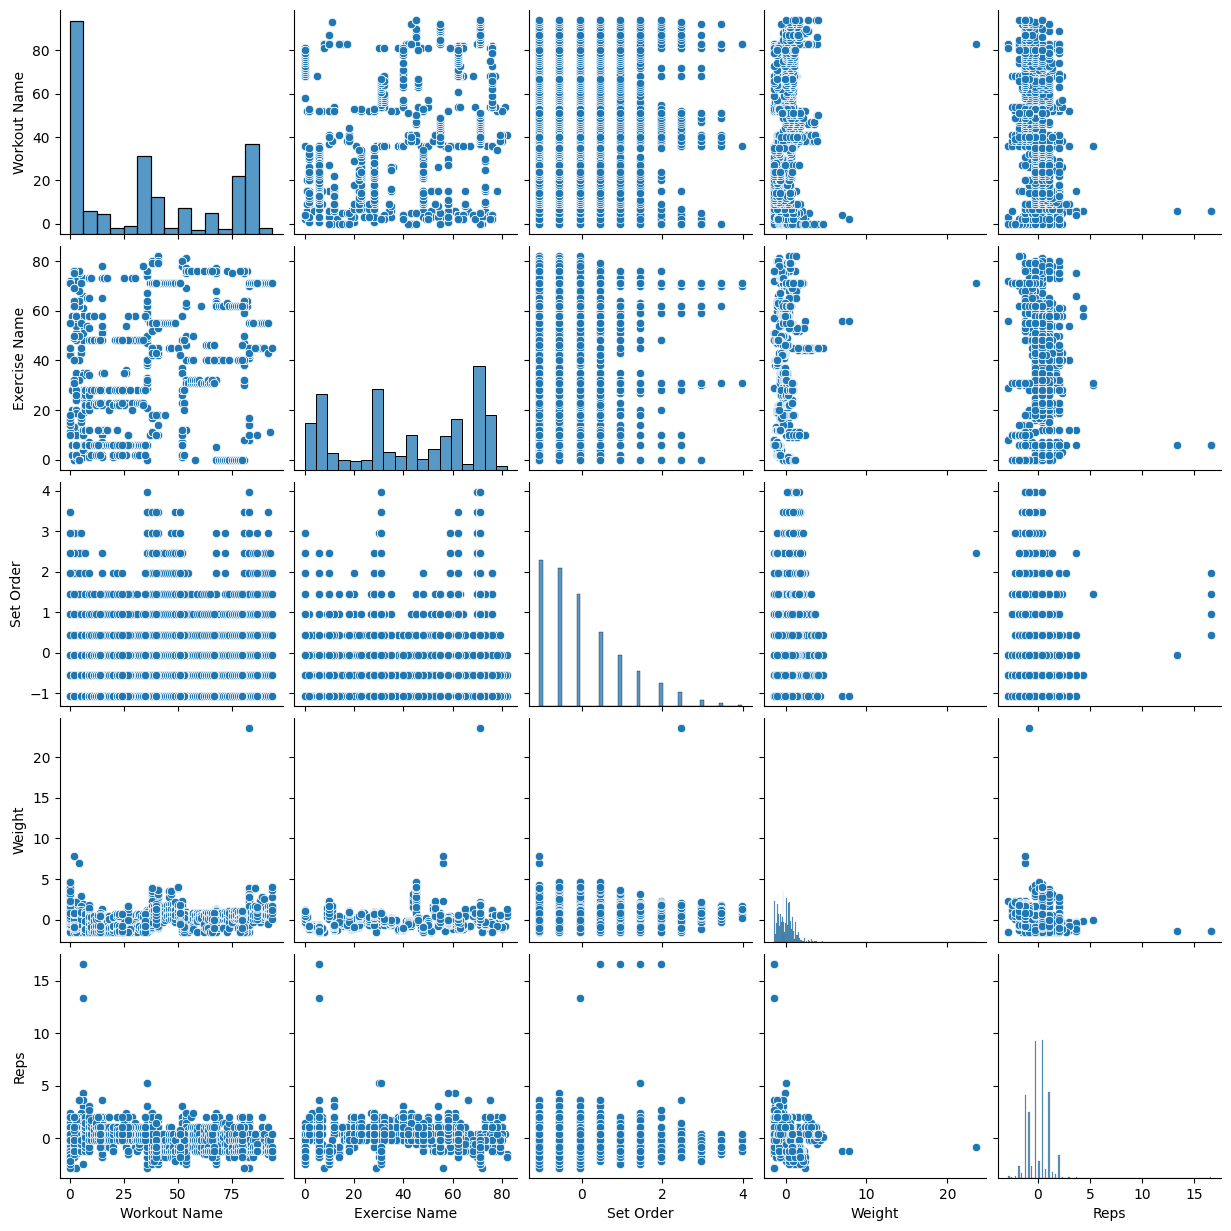

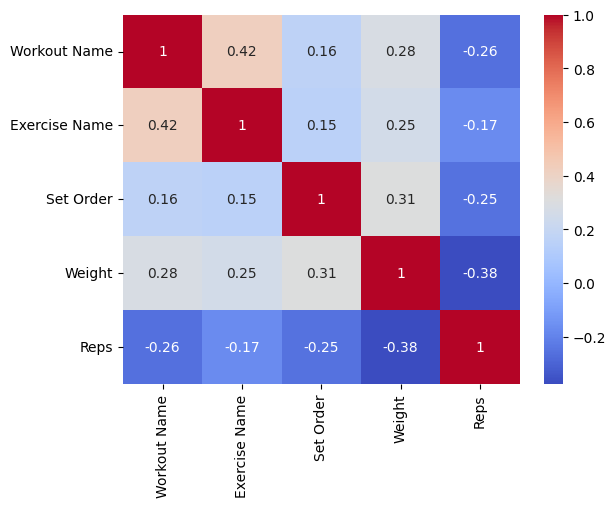

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(selected_columns)
plt.show()

sns.heatmap(selected_columns.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = selected_columns.drop(columns=[target_column])
y = selected_columns[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (7945, 4)
Testing data size: (1987, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

if y.nunique() < 10: 
    model = RandomForestClassifier(random_state=42)
else:  
    model = LinearRegression()


In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

if y.nunique() < 10:
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

else:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R² Score:", r2)


Mean Squared Error: 0.709993166091093
R² Score: 0.17171304318377612


In [ ]:
from sklearn.metrics import classification_report

if y.nunique() < 10:
    print(classification_report(y_test, y_pred))


In [ ]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training score:", train_score)
print("Testing score:", test_score)

if train_score - test_score > 0.1:
    print("Model may be overfitting.")
elif test_score < 0.5:
    print("Model may be underfitting.")
else:
    print("Model is generalizing well.")


Training score: 0.1887124533020602
Testing score: 0.17171304318377612
Model may be underfitting.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(y_pred)


[ -49.61118494   -4.37671382   49.88880154  -10.45206481   65.51324808
  111.21870132  167.4948888  -105.31349891 -180.98027556  -44.18038024
   87.4582788  -106.1242423   113.38829817  -44.68413793  103.58019358
   78.45019273  -10.79805481   -0.33765184  -59.78209002   38.69162499]
